<a href="https://colab.research.google.com/github/erhnk/Churn-Modelling/blob/main/LightGBM_%C4%B0le_Model_Kurma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LightGBM İle Model

In [349]:
light_siniflandirici = lgb.LGBMClassifier(   
    task = 'train',
    boosting_type =  'gbdt',
    objective =  'binary',
    metric = 'auc',
    num_leaves = 11,
    learning_rate = 0.01,
    verbose = -1)
light_siniflandirici.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               metric='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=11,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, task='train',
               verbose=-1)

In [350]:
light_y_pred = light_siniflandirici.predict(X_test)

In [351]:
print('İsabetlilik değeri:', accuracy_score(y_test,light_y_pred))

İsabetlilik değeri: 0.8466666666666667


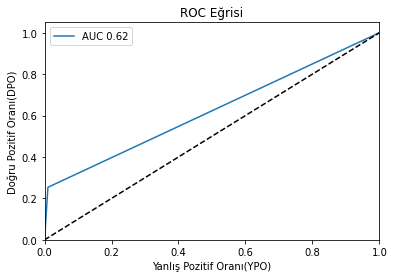

In [352]:
ypo,dpo,esikDeger = roc_curve(y_test,light_y_pred)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

LightGBM için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


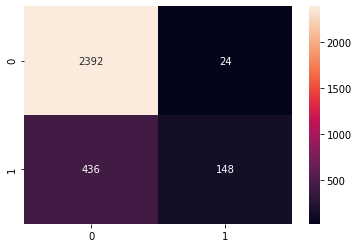

In [358]:
light_confusion= sns.heatmap(confusion_matrix(y_test,light_y_pred), annot=True, fmt='g');
print("LightGBM için confusion_matrix :\n\n",light_confusion)

In [360]:
print(classification_report(y_test,light_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2416
           1       0.86      0.25      0.39       584

    accuracy                           0.85      3000
   macro avg       0.85      0.62      0.65      3000
weighted avg       0.85      0.85      0.81      3000



LightGBM için model tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'boosting_type': ['gbdt'],'metric': ['auc'],
                     'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.7,0.08,0.1,0.2,0.5,0.6,0.8,1],
                     'num_leaves': [3,5,7,9,11,13,15,17,19,21,23,25,31,63,127,255],
                     'verbose' : [-1],
                     "max_depth": [1,2,3,4,5,7]}]

cValidation_search = GridSearchCV(lgb.LGBMClassifier(), tuned_parameters, cv=5, scoring ='accuracy')
cValidation_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=Tru...
             iid='deprecated', n_jobs=None,
             param_grid=[{'boosting_type': ['gbdt'],
                          'learning_rate': [0.05, 0.01, 0.02, 0.03, 0.04, 0.05,
                                            0.06, 0.7, 0.08, 0.1, 0.2, 0.5, 0.6,
               

In [ ]:
print('En iyi model : ', cValidation_search.best_params_)
print('Bu modelin ortalama skoru (roc_auc) :', cValidation_search.best_score_)

En iyi model :  {'boosting_type': 'gbdt', 'learning_rate': 0.04, 'max_depth': 7, 'metric': 'auc', 'num_leaves': 17, 'verbose': -1}
Bu modelin ortalama skoru (roc_auc) : 0.8594285714285714


In [354]:
light_siniflandirici1 = lgb.LGBMClassifier(   
    task = 'train',
    boosting_type =  'gbdt',
    objective =  'binary',
    metric = 'auc',
    max_depth = 7,
    num_leaves = 17,
    learning_rate = 0.04,
    verbose = -1)
light_siniflandirici1.fit(X_train, y_train)
light_y_pred1 = light_siniflandirici1.predict(X_test)

In [355]:
print('İsabetlilik değeri:', accuracy_score(y_test,light_y_pred1))

İsabetlilik değeri: 0.864


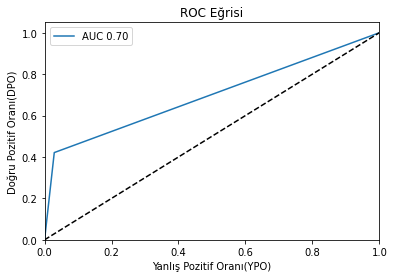

In [356]:
ypo,dpo,esikDeger = roc_curve(y_test,light_y_pred1)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

En iyi parametrelerle LightGBM için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


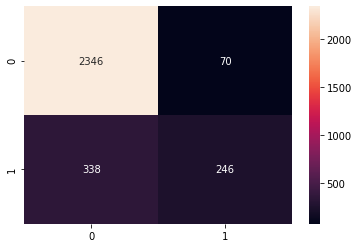

In [359]:
light_confusion1= sns.heatmap(confusion_matrix(y_test,light_y_pred1), annot=True, fmt='g');
print("En iyi parametrelerle LightGBM için confusion_matrix :\n\n",light_confusion1)

In [361]:
print(classification_report(y_test,light_y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2416
           1       0.78      0.42      0.55       584

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.73      3000
weighted avg       0.86      0.86      0.85      3000



In [ ]:
#Yeni parametreler ile kurduğumuz LightGBM modelinin performasına baktığımızda isabetliklik skorunun 0,018 artarak 0.864 olarak elde edildiği görülüyor.
#Parametre güncellemesinin ardından kurulan LightGBM modelinin auc skoru 0.62'dan 0.70'a yükselmiştir.
#Yeni kurulan modelin doğru sınıflandırma sayısı 2540'ten 2592'e yükselmiştir.
#Aynı zamanda son modelin bankadan ayrılan kişileri doğru tahmin sayısı 148'ten 246'e yükselmiştir. Bankadan ayrılacak olan 98 kişiyi daha doğru sınıflandırmıştır.
#f1-score 0.39'dan 0.55'e yükselmiştir.